# **Zomato Project - Data Science**

Predict whether the restaurant will succeed or not?

Lets mounts the google drive and import all the required libraries

# 1. Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd     
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Zomato Project ML Data/zomato.csv')

In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# 2. Understanding Your Data

1. Shape of your data
2. Columns in your data
3. NULL values in your data by column
4. Create a list of features that have NULL values
5. Report % of NULL values in each feature of the dataset
6. df.info()

In [ ]:
df.shape

(51717, 17)

In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
features_na = []
for feature in df.columns:
  if df[feature].isnull().sum()>1:
    features_na.append(feature)

features_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [ ]:
for feature in features_na:
  print('{} has {}% missing values'.format(feature, np.round((df[feature].isnull().sum() * 100/len(df)), 4)))

rate has 15.0337% missing values
phone has 2.3358% missing values
location has 0.0406% missing values
rest_type has 0.4389% missing values
dish_liked has 54.2916% missing values
cuisines has 0.087% missing values
approx_cost(for two people) has 0.669% missing values


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# 3. Data Cleaning - Cleaning Approx cost and Rate columns

What we did here:

1.   Clean the approx_cost(for two people) column - replace ',' with '' in this cost and then convert to float.
2.   Clean the rate column - extract the ratings out if 5 and convert to float.



In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [ ]:
df[df['approx_cost(for two people)'].isnull()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
1662,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Bannerghatta Road
1768,https://www.zomato.com/bangalore/innate-jp-nag...,"45, 14th Main, 7th phase, Puttehahalli Palya, ...",Innate,No,No,NaN,0,NaN,JP Nagar,Delivery,NaN,Beverages,NaN,[],[],Delivery,Bannerghatta Road
1795,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,NaN,0,NaN,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Bannerghatta Road
3069,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,-,0,NaN,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Basavanagudi
3774,https://www.zomato.com/bangalore/the-hub-ibis-...,"Ibis Bengaluru, Opposite RMZ Ecospace Business...",The Hub - Ibis Bengaluru,No,No,3.9/5,237,NaN,Marathahalli,Bar,"Dal Makhani, Cocktails, Lunch Buffet, Breakfas...",Finger Food,NaN,"[('Rated 4.0', 'RATED\n The Hub is a small ba...",[],Buffet,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50940,https://www.zomato.com/bangalore/cinnabon-whit...,"Ground Floor, The Forum Neighborhood Mall, Pre...",Cinnabon,No,No,4.0 /5,80,NaN,Whitefield,Quick Bites,"Rolls, Cinnamon Roll, Cinnamon Bun","Beverages, American, Bakery",NaN,"[('Rated 4.0', ""RATED\n Who else is a Cinnabo...",[],Desserts,Whitefield
51233,https://www.zomato.com/bangalore/mayas-kitchen...,"43/9, Borewell Rd, Palm Meadows, Nallurhalli, ...",Mayas kitchen,No,No,NaN,0,NaN,Whitefield,Casual Dining,NaN,"South Indian, Chinese, Chettinad",NaN,"[('Rated 4.0', ""RATED\n Food was pretty good,...",[],Dine-out,Whitefield
51247,https://www.zomato.com/bangalore/mast-kalandar...,"D64, 33, 1st Floor, Sundari Armadale, Next To ...",Mast Kalandar,No,No,2.6 /5,76,NaN,Whitefield,Casual Dining,"Gulab Jamun, Lassi, Dal Makhani, Buttermilk, T...",North Indian,NaN,"[('Rated 1.0', 'RATED\n Terrible food in this...",[],Dine-out,Whitefield
51271,https://www.zomato.com/bangalore/karavalli-foo...,"N254-107, 1st Main Road, Near ITPL Gate 3, KIA...",Karavalli Food Court,No,No,3.2 /5,4,NaN,Whitefield,Casual Dining,NaN,South Indian,NaN,"[('Rated 1.0', 'RATED\n i was a regular custo...",[],Dine-out,Whitefield


In [ ]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [ ]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).apply(lambda x:x.replace(',', ''))

In [ ]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'nan', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [ ]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

In [ ]:
df['approx_cost(for two people)'].dtype

dtype('float64')

In [ ]:
df['rate'].dtype

dtype('O')

In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
df['rate'].isnull().sum()

7775

In [ ]:
def split(x):
  rating = x.split("/")[0]
  return rating

df['rate'] = df['rate'].apply(lambda x: split(str(x)))

In [ ]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [ ]:
df['rate'].replace('-', 0, inplace = True)
df['rate'].replace('NEW', 0, inplace = True)

In [ ]:
df['rate'] = df['rate'].astype(float)

In [ ]:
df['rate'].dtype

dtype('float64')

In [ ]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, nan, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4,
       2.2, 2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [ ]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

# 3.1 Categories of Restaurants

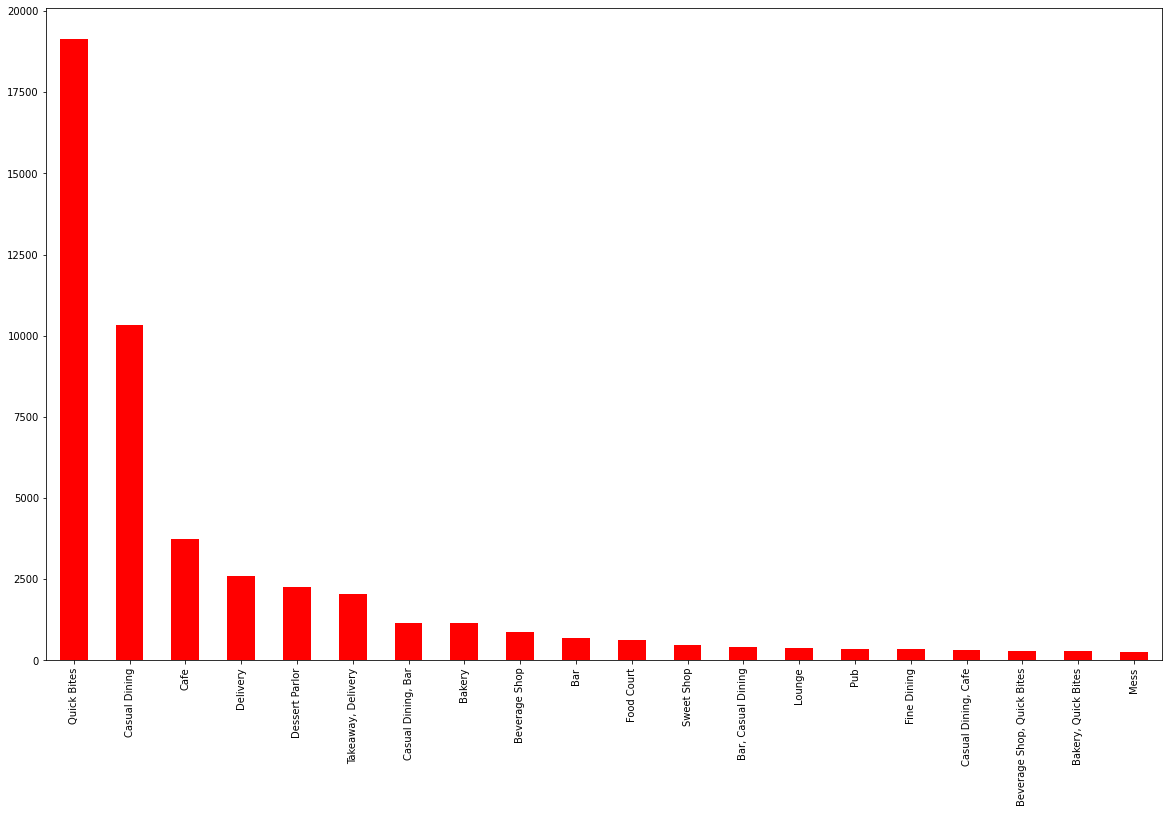

In [ ]:
plt.figure(figsize=(20,12))
df['rest_type'].value_counts().nlargest(20).plot.bar(color = 'red')

In [ ]:
def mark(x):
  if x in ('Quick Bites', 'Casual Dining'):
    return 'Quick Bites+Casual Dining'
  else:
    return 'others'

df['Top_types'] = df['rest_type'].apply(lambda x: mark(x))

In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+Casual Dining


In [ ]:
! pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px

In [ ]:
df['Top_types'].value_counts().values

array([29462, 22255])

In [ ]:
df['Top_types'].value_counts().index

Index(['Quick Bites+Casual Dining', 'others'], dtype='object')

In [ ]:
values = df['Top_types'].value_counts().values

In [ ]:
labels = df['Top_types'].value_counts().index

In [ ]:
fig = px.pie(data_frame=df, names = labels, values = values)
fig.show()

# 3.2 Restaurant Overview Analysis

In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+Casual Dining


In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types'],
      dtype='object')

In [ ]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
Top_types                       object
dtype: object

In [ ]:
rest = df.groupby(by = 'name').agg({'votes':'sum', 'url':'count', 'approx_cost(for two people)':'mean', 'rate':'mean'}).reset_index()
rest

,name,votes,url,approx_cost(for two people),rate
0,#FeelTheROLL,14,2,200.0,3.400000
1,#L-81 Cafe,432,9,400.0,3.900000
2,#Vibes Restro,0,3,700.0,NaN
3,#refuel,111,3,400.0,3.700000
4,'Brahmins' Thatte Idli,0,1,100.0,NaN
...,...,...,...,...,...
8787,late100,0,5,200.0,NaN
8788,nu.tree,1443,8,400.0,4.314286
8789,re:cess - Hilton Bangalore Embassy GolfLinks,438,3,1200.0,4.100000
8790,repEAT Hub,0,2,200.0,NaN


In [ ]:
rest.columns = ['name', 'total_votes', 'total_unities', 'avg_approx_cost', 'mean_rating']
rest.head()

,name,total_votes,total_unities,avg_approx_cost,mean_rating
0,#FeelTheROLL,14,2,200.0,3.4
1,#L-81 Cafe,432,9,400.0,3.9
2,#Vibes Restro,0,3,700.0,NaN
3,#refuel,111,3,400.0,3.7
4,'Brahmins' Thatte Idli,0,1,100.0,NaN


In [ ]:
rest['votes_per_unity'] = rest['total_votes']/rest['total_unities']
rest.head()

,name,total_votes,total_unities,avg_approx_cost,mean_rating,votes_per_unity
0,#FeelTheROLL,14,2,200.0,3.4,7.0
1,#L-81 Cafe,432,9,400.0,3.9,48.0
2,#Vibes Restro,0,3,700.0,NaN,0.0
3,#refuel,111,3,400.0,3.7,37.0
4,'Brahmins' Thatte Idli,0,1,100.0,NaN,0.0


In [ ]:
popular = rest.sort_values(by = 'total_unities', ascending=False)
popular

,name,total_votes,total_unities,avg_approx_cost,mean_rating,votes_per_unity
1320,Cafe Coffee Day,3089,96,844.791667,3.147191,32.177083
5549,Onesta,347520,85,600.000000,4.410588,4088.470588
3788,Just Bake,2898,73,400.000000,3.355882,39.698630
2446,Empire Restaurant,229808,71,685.211268,3.916901,3236.732394
2577,Five Star Chicken,3134,70,257.857143,3.425000,44.771429
...,...,...,...,...,...,...
1900,Cool Break,11,1,150.000000,3.400000,11.000000
8076,The Shake Factory Originals,8,1,200.000000,3.300000,8.000000
5216,Nethravathi Military Hotel,0,1,200.000000,NaN,0.000000
7426,Swadisht North Indian Restaurant,23,1,200.000000,3.200000,23.000000


In [ ]:
# Restaurant overview analysis

# avg votes received by restaurants
# Top 5 most voted restaurants
# Top 5 least voted restaurants

In [ ]:
popular.sort_values(by = 'total_votes', ascending=False).query('total_votes > 0').head(5)

,name,total_votes,total_unities,avg_approx_cost,mean_rating,votes_per_unity
5549,Onesta,347520,85,600.000000,4.410588,4088.470588
8269,Truffles,301059,43,900.000000,4.595349,7001.372093
2446,Empire Restaurant,229808,71,685.211268,3.916901,3236.732394
3054,Hammered,180602,47,1272.340426,4.329787,3842.595745
7751,The Black Pearl,172122,18,1427.777778,4.727778,9562.333333


Text(0.5, 1.0, 'Top 5 least voted restaurants')

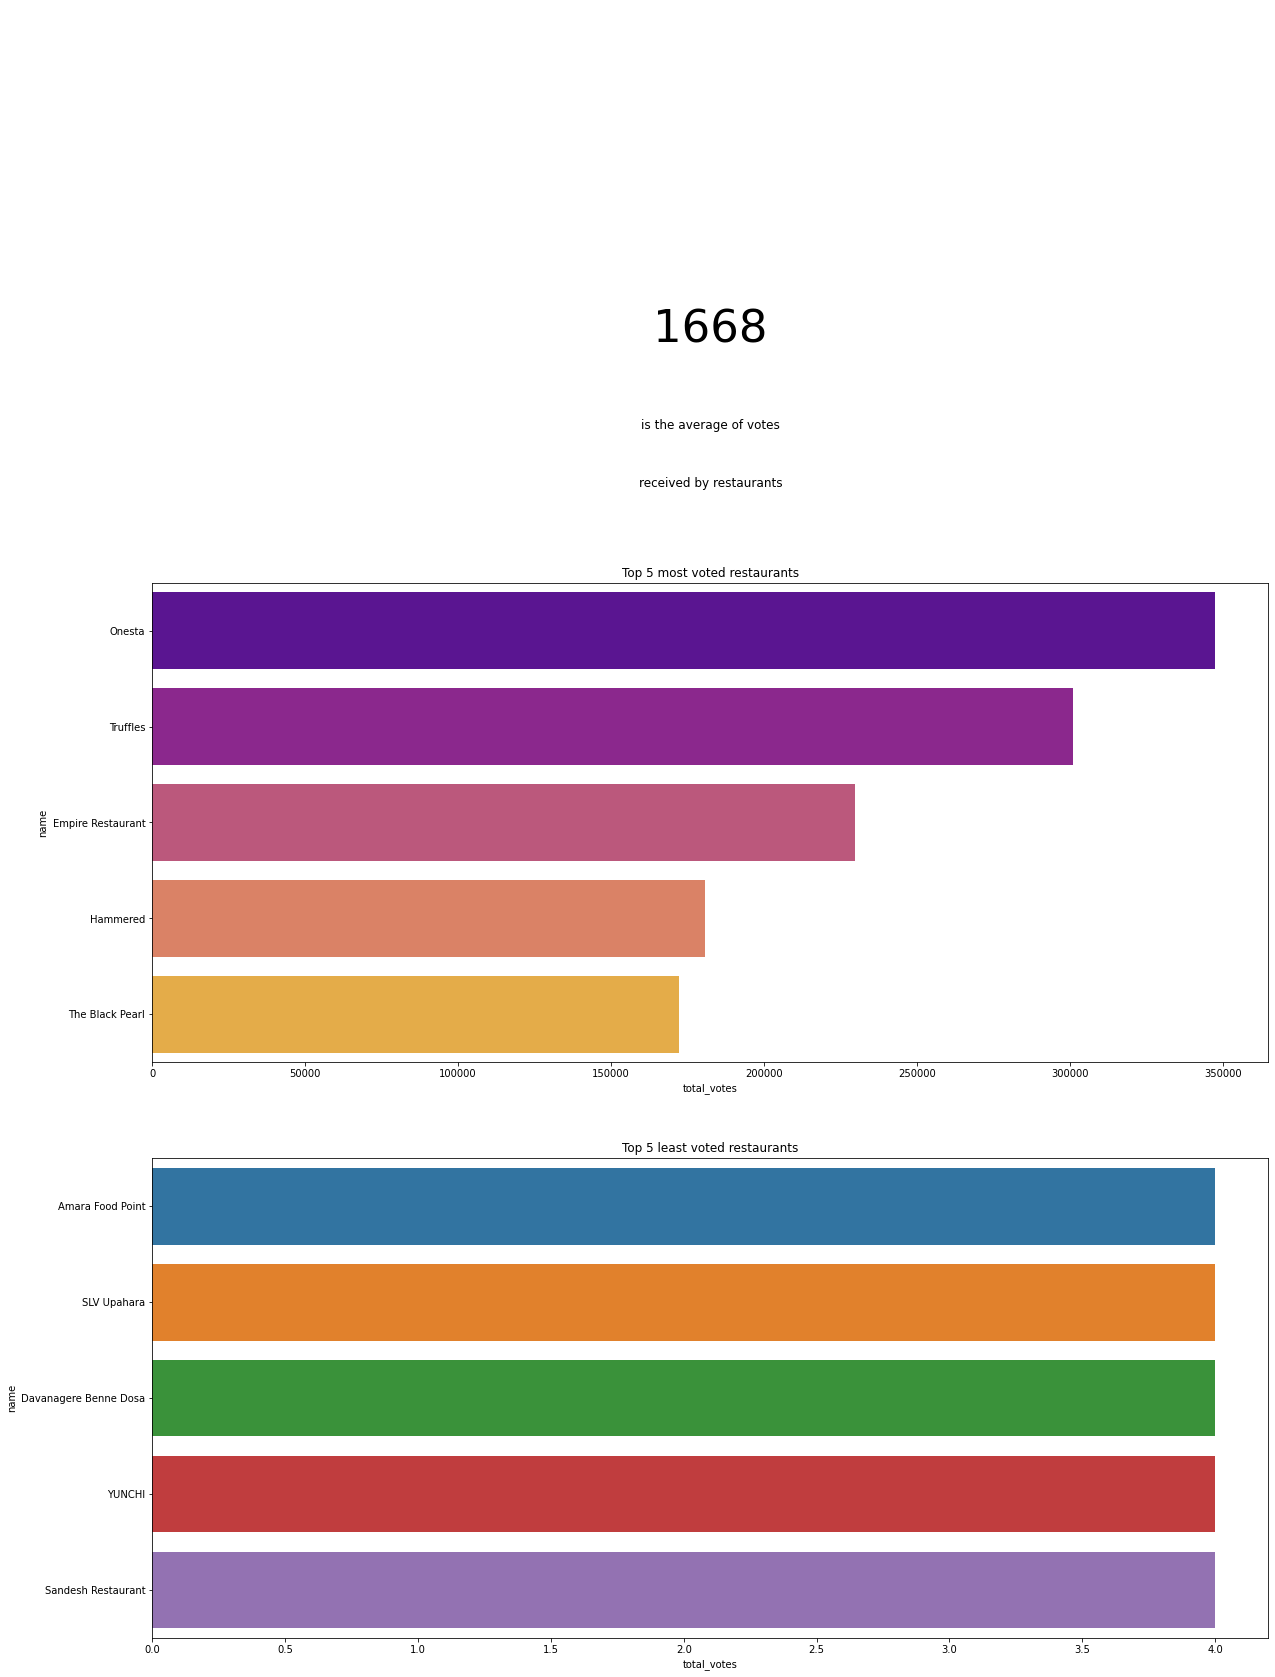

In [ ]:
fig, (ax1, ax2, ax3)  = plt.subplots(nrows=3, ncols=1, figsize = (20,30))
ax1.text(0.5, 0.3, int(popular['total_votes'].mean()), fontsize = 45, ha = 'center')
ax1.text(0.5, 0.12, 'is the average of votes', fontsize = 12, ha = 'center')
ax1.text(0.5, 0, 'received by restaurants', fontsize = 12, ha = 'center')
ax1.axis('off')

sns.barplot(x = 'total_votes', y = 'name', data = popular.sort_values(by = 'total_votes', ascending=False).query('total_votes > 0').head(5), ax = ax2, palette='plasma')
ax2.set_title('Top 5 most voted restaurants')
sns.barplot(x = 'total_votes', y = 'name', data = popular.sort_values(by = 'total_votes', ascending=True).query('total_votes > 0').head(5), ax = ax3)
ax3.set_title('Top 5 least voted restaurants')

# 3.3 In Depth Analysis of Restaurant

In [ ]:
# Most expenve and cheapest restaurants

Text(0.5, 1.0, 'Top 5 cheapest restaurants')

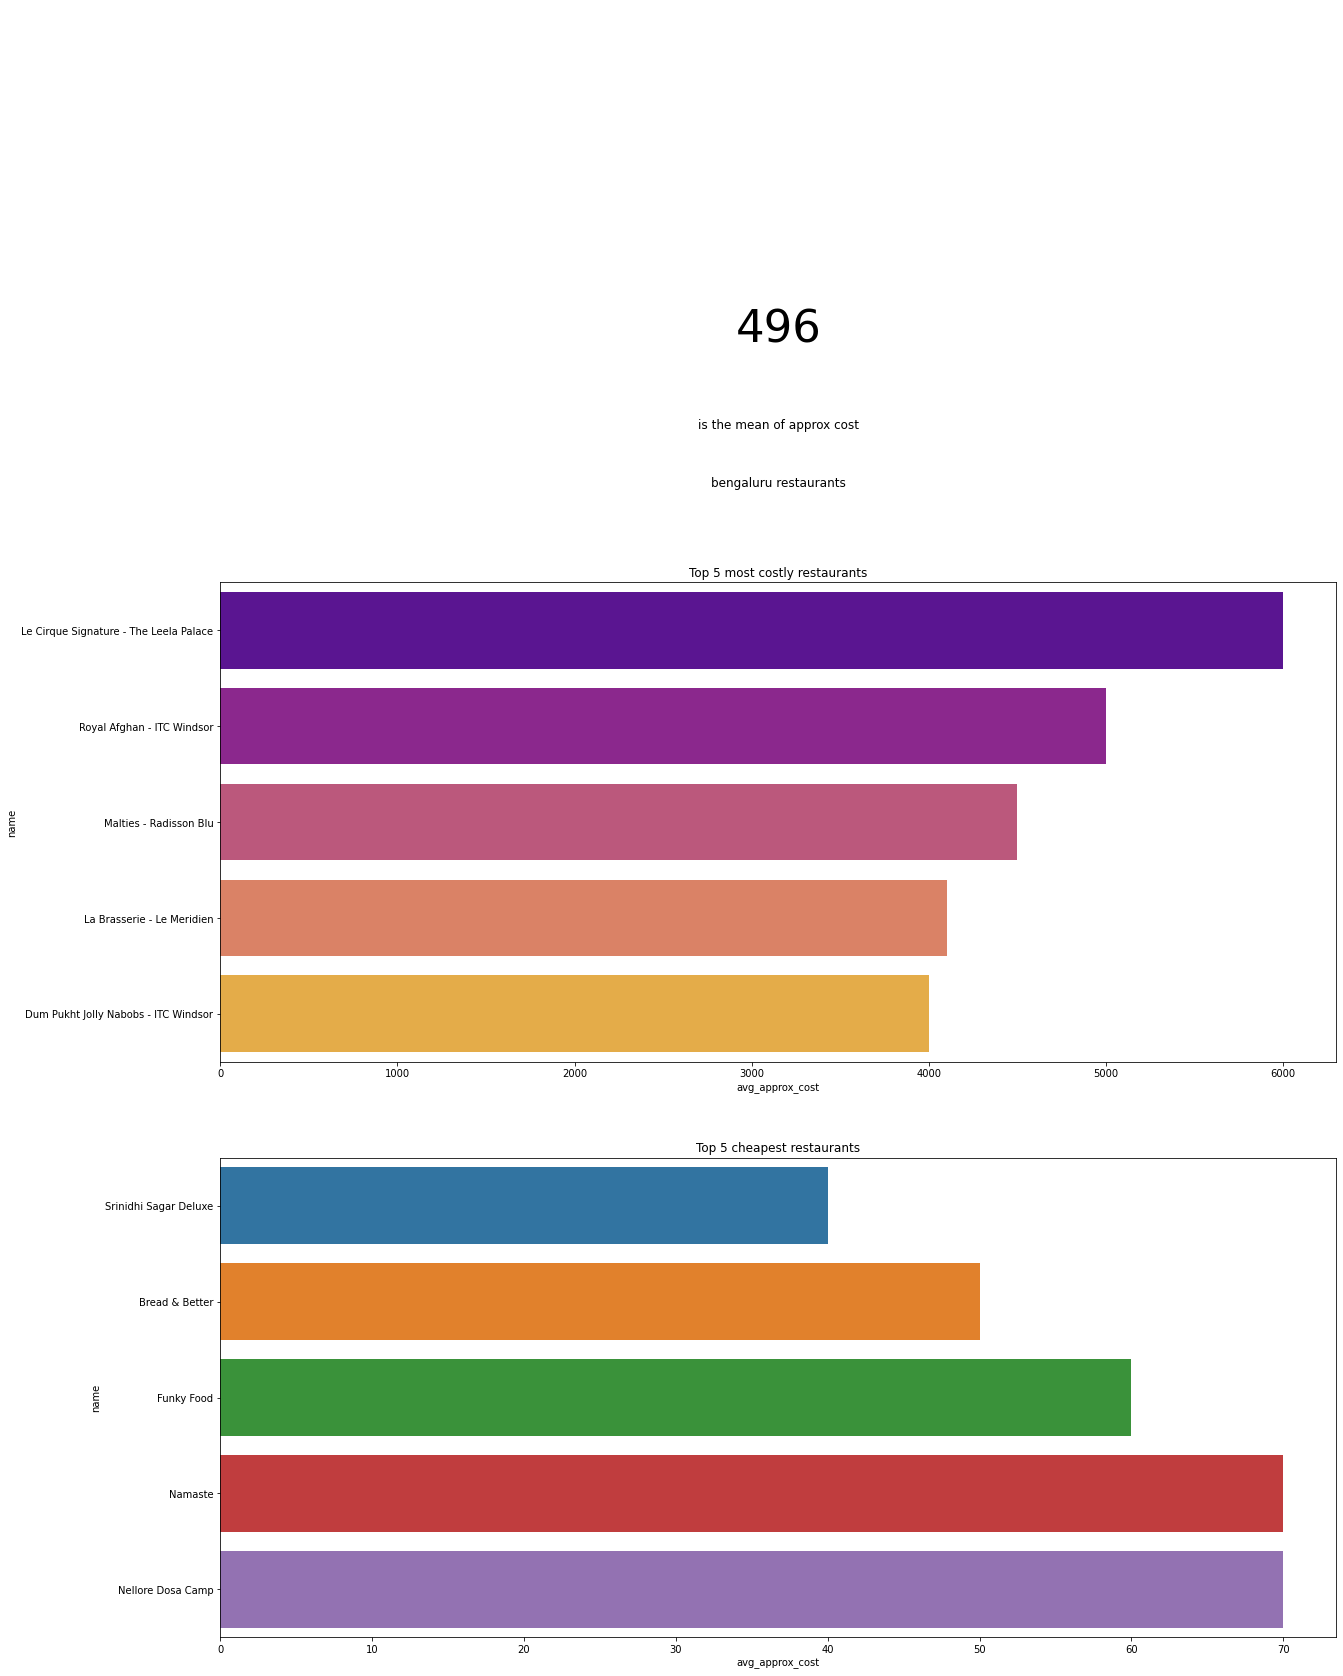

In [ ]:
fig, (ax1, ax2, ax3)  = plt.subplots(nrows=3, ncols=1, figsize = (20,30))
ax1.text(0.5, 0.3, int(popular['avg_approx_cost'].mean()), fontsize = 45, ha = 'center')
ax1.text(0.5, 0.12, 'is the mean of approx cost', fontsize = 12, ha = 'center')
ax1.text(0.5, 0, 'bengaluru restaurants', fontsize = 12, ha = 'center')
ax1.axis('off')

sns.barplot(x = 'avg_approx_cost', y = 'name', data = popular.sort_values(by = 'avg_approx_cost', ascending=False).query('avg_approx_cost > 0').head(5), ax = ax2, palette='plasma')
ax2.set_title('Top 5 most costly restaurants')
sns.barplot(x = 'avg_approx_cost', y = 'name', data = popular.sort_values(by = 'avg_approx_cost', ascending=True).query('avg_approx_cost > 0').head(5), ax = ax3)
ax3.set_title('Top 5 cheapest restaurants')

In [ ]:
x = df['book_table'].value_counts()
x

No     45268
Yes     6449
Name: book_table, dtype: int64

In [ ]:
labels = ['not book', 'booking']

In [ ]:
import plotly.graph_objects as go
from plotly.offline import iplot

In [ ]:
trace = go.Pie(labels=labels, values = x, hoverinfo = 'label+percent', textinfo='percent')
iplot([trace])

In [ ]:
x = df['online_order'].value_counts()
x

Yes    30444
No     21273
Name: online_order, dtype: int64

In [ ]:
labels = ['accepted', 'not accepted']

In [ ]:
fig = px.pie(data_frame = df, names = labels, values = x, title = 'Pie Chart')
fig.show()

# 3.4 Best Budget Restaurants

In [ ]:
filter = (df['approx_cost(for two people)'] <= 400) & (df['location'] == 'BTM') & (df['rate'] >= 4) & (df['rest_type'] == 'Quick Bites')
budget = df[filter]
budget

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
928,https://www.zomato.com/bangalore/hiyar-majhe-k...,"57/1, Near Alliance University, 19th Cross, 7t...",Hiyar Majhe Kolkata,Yes,No,4.0,244,+91 9108919806\r\r\n+91 9739059571,BTM,Quick Bites,"Radhaballavi, Biryani, Egg Noodles, Egg Roll, ...","Bengali, North Indian",400.0,"[('Rated 4.0', 'RATED\n I like this restauran...",[],Delivery,Bannerghatta Road,Quick Bites+Casual Dining
934,https://www.zomato.com/bangalore/swadista-aaha...,"947, 16th Main Road, 2nd Stage, BTM, Bangalore",Swadista Aahar,Yes,No,4.1,775,+91 9844006825\r\r\n+91 9844615361,BTM,Quick Bites,"Panneer Butter Masala, Idli, Masala Dosa, Vada...","South Indian, North Indian, Chinese, Street Food",300.0,"[('Rated 3.0', ""RATED\n Ordered south Indian ...",[],Delivery,Bannerghatta Road,Quick Bites+Casual Dining
940,https://www.zomato.com/bangalore/swad-punjab-d...,"324, 23rd Main, 3rd Cross, 2nd Stage, BTM, Ban...",Swad Punjab Da,Yes,No,4.0,126,+91 8360151853,BTM,Quick Bites,"Lassi, Roti, Veg Thali, Aloo Paratha, Egg Curry",North Indian,150.0,"[('Rated 4.0', 'RATED\n If you can visit and ...","['Dal with Sabji Combo', 'Dal Sabji with 4 Cha...",Delivery,Bannerghatta Road,Quick Bites+Casual Dining
942,https://www.zomato.com/bangalore/roti-wala-btm...,"688, 7th Main, 10th Cross Main Road, 2nd Stage...",Roti Wala,Yes,No,4.0,197,+91 9731100002,BTM,Quick Bites,"Gulab Jamun, Buttermilk, Egg Bhurji, Sprout Sa...",North Indian,300.0,"[('Rated 5.0', 'RATED\n Well, I never had a c...",[],Delivery,Bannerghatta Road,Quick Bites+Casual Dining
954,https://www.zomato.com/bangalore/litti-twist-b...,"No 43, 7th Main Road, NS Palaya, BTM 2nd Stage...",Litti Twist,Yes,No,4.1,464,+91 8884270523,BTM,Quick Bites,"Litti, Liti Chokha, Lassi, Tea, Paratha, Thali...","North Indian, Bihari",300.0,"[('Rated 4.0', ""RATED\n It's a great outlet t...",[],Delivery,Bannerghatta Road,Quick Bites+Casual Dining
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37151,https://www.zomato.com/bangalore/muthashys-btm...,"3, Brindavan Complex, 20th Main, Maruthi Nagar...",Muthashy's,Yes,No,4.2,472,080 42274488\n+91 9844162560,BTM,Quick Bites,"Fish, Appam, Egg Roast, Kadala Curry, Chicken ...","Kerala, South Indian, Chinese",400.0,"[('Rated 4.0', 'RATED\n Typical Kerala cusine...","['Parotta', 'Egg Curry', 'Veg Kuruma', 'Fish C...",Dine-out,Koramangala 7th Block,Quick Bites+Casual Dining
37152,https://www.zomato.com/bangalore/kannur-food-p...,"6/21, 10th Cross, 1st Main, Venkateshwara Layo...",Kannur Food Point,No,No,4.0,141,+91 9886165106,BTM,Quick Bites,"Roast Chicken, Thalassery Biryani","Kerala, Chinese",200.0,"[('Rated 5.0', ""RATED\n Order chicken roast a...",[],Dine-out,Koramangala 7th Block,Quick Bites+Casual Dining
37181,https://www.zomato.com/bangalore/ashirvaad-gra...,"Makana Tower, Tavarekere Main Road",Ashirvaad Grand,Yes,No,4.0,115,080 26844799\n080 26847799,BTM,Quick Bites,"Masala Dosa, Panneer Butter Masala","Chinese, North Indian, South Indian",400.0,"[('Rated 5.0', 'RATED\n Very quick delivery a...","['3 Idly', 'Idly Vada', 'Chow Chow Bath', 'Mas...",Dine-out,Koramangala 7th Block,Quick Bites+Casual Dining
37201,https://www.zomato.com/bangalore/swad-punjab-d...,"324, 23rd Main, 3rd Cross, 2nd Stage, BTM, Ban...",Swad Punjab Da,Yes,No,4.1,134,+91 8360151853,BTM,Quick Bites,"Lassi, Veg Thali, Roti, Aloo Paratha, Egg Curry",North Indian,150.0,"[('Rated 5.0', 'RATED\n Good delivery'), ('Ra...",[],Dine-out,Koramangala 7th Block,Quick Bites+Casual Dining


In [ ]:
budget['name'].unique()

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

In [ ]:
def return_budget(location, restaurant_type):
  filter = (df['approx_cost(for two people)'] <= 400) & (df['location'] == location) & (df['rate'] >= 4) & (df['rest_type'] == restaurant_type)
  budget = df[filter]
  return budget['name'].unique()

In [ ]:
return_budget('BTM', 'Quick Bites')

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

In [ ]:
# Latitudes and Longitudes for geographical analysis

In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+Casual Dining


In [ ]:
! pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
geolocator = Nominatim(user_agent = 'app')

In [ ]:
data = df['name'][0]
data

'Jalsa'

In [ ]:
data = geolocator.geocode(data)

In [ ]:
data.latitude

18.5150741

In [ ]:
data.longitude

73.82920125

# 3.5 Geographical Analysis

In [ ]:
# Already installed geopy above
# Get lat and longs of location column

In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+Casual Dining


In [ ]:
df.shape

(51717, 18)

In [ ]:
df['location'].nunique()      # How many unique locations in the locations column

93

In [ ]:
locations = pd.DataFrame({'name':df['location'].unique()})
locations

,name
0,Banashankari
1,Basavanagudi
2,Mysore Road
3,Jayanagar
4,Kumaraswamy Layout
...,...
89,West Bangalore
90,Magadi Road
91,Yelahanka
92,Sahakara Nagar


In [ ]:
# geolocator.geocode(location)

In [ ]:
lat = []
lon = []

for location in locations['name']:
  location = geolocator.geocode(location)
  print(location)
  if location is None:
    lat.append(np.nan)
    lon.append(np.nan)
  else:
    lat.append(location.latitude)
    lon.append(location.longitude)

Banashankari, Badami taluku, Bagalkote district, Karnataka, 587200, India
Basavanagudi, Jayanagar Ward, South Zone, Bengaluru, Bangalore North, Bangalore Urban, Karnataka, 560004, India
Mysore Road, Ganapathy Nagar, Deepanjali Nagar, South Zone, Bengaluru, Bangalore South, Bangalore Urban, Karnataka, 566026, India
Jayanagar, Buddhabatika, Buddhabhumi, Kapilvastu, Lumbini Province, 32809, नेपाल
Kumaraswamy Layout, Padmanabha Nagar, South Zone, Bengaluru, Bangalore South, Bangalore Urban, Karnataka, 560061, India
Rajarajeshwari Nagar, Rajarajeshwari Nagar Zone, Bengaluru, Bangalore South, Bangalore Urban, Karnataka, 560098, India
Vijay Nagar, Miraj, Sangli, Maharashtra, 416409, India
Uttarahalli, Bommanahalli Zone, Bengaluru, Bangalore South, Bangalore Urban, Karnataka, India
JP Nagar, Mysuru, Mysuru taluk, Mysuru district, Karnataka, 570001, India
Rajnandani Hospital, Bangalore, 6 C Cross Road, Srinidhi Layout, Anjanapura, Bommanahalli Zone, Bengaluru, Bangalore South, Bangalore Rural, 

In [ ]:
locations['latitude'] = lat
locations['longitude'] = lon
locations.head()

,name,latitude,longitude
0,Banashankari,15.887678,75.704678
1,Basavanagudi,12.941726,77.575502
2,Mysore Road,12.946662,77.530090
3,Jayanagar,27.643927,83.052805
4,Kumaraswamy Layout,12.908149,77.555318


In [ ]:
rest_locations = df['location'].value_counts().reset_index()
rest_locations

,index,location
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144
...,...,...
88,West Bangalore,6
89,Yelahanka,6
90,Jakkur,3
91,Rajarajeshwari Nagar,2


In [ ]:
rest_locations.columns = ['name', 'count']
rest_locations

,name,count
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144
...,...,...
88,West Bangalore,6
89,Yelahanka,6
90,Jakkur,3
91,Rajarajeshwari Nagar,2


In [ ]:
Restaurant_locations = rest_locations.merge(locations, left_on = 'name', right_on = 'name').dropna()
Restaurant_locations

,name,count,latitude,longitude
0,BTM,5124,45.954851,-112.496595
1,HSR,2523,18.147500,41.538889
2,Koramangala 5th Block,2504,12.934843,77.618977
3,JP Nagar,2235,12.265594,76.646540
4,Whitefield,2144,53.553368,-2.296902
...,...,...,...,...
88,West Bangalore,6,12.984852,77.540063
89,Yelahanka,6,13.100698,77.596345
90,Jakkur,3,13.078474,77.606894
91,Rajarajeshwari Nagar,2,12.927441,77.515522


In [ ]:
! pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium

In [ ]:
from folium.plugins import HeatMap

In [ ]:
basemap = folium.Map(location = [12.97, 77.59])
basemap

In [ ]:
HeatMap(data = Restaurant_locations[['latitude', 'longitude', 'count']]).add_to(basemap)

In [ ]:
basemap

# 3.6 Customer Behaviours using WordCloud

In [ ]:
! pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
data = df[df['rest_type'] == 'Quick Bites']
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining
31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500.0,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari,Quick Bites+Casual Dining
34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500.0,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari,Quick Bites+Casual Dining
36,https://www.zomato.com/bangalore/fast-and-fres...,"32, 7th Main Road, Dwaraka Nagar,Near PES Coll...",Fast And Fresh,Yes,No,2.8,91,+91 9742974232,Banashankari,Quick Bites,NaN,"North Indian, Chinese, Fast Food",400.0,"[('Rated 1.0', 'RATED\n Half baked rice in a ...",[],Delivery,Banashankari,Quick Bites+Casual Dining
39,https://www.zomato.com/bangalore/maruthi-davan...,"556/A, Water Tank Road, 3rd Stage, Banashankar...",Maruthi Davangere Benne Dosa,Yes,No,4.0,17,+91 9019563485,Banashankari,Quick Bites,NaN,South Indian,150.0,"[('Rated 5.0', ""RATED\n This restaurant serve...","['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...",Delivery,Banashankari,Quick Bites+Casual Dining
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51641,https://www.zomato.com/bangalore/andhra-spices...,"188, ITPL Main Road, Brookefields, Bangalore, ...",Andhra Spices,No,No,3.2,4,NaN,Brookefield,Quick Bites,NaN,"Andhra, Chinese, South Indian",NaN,"[('Rated 2.0', ""RATED\n Food is not upto the ...",[],Dine-out,Whitefield,Quick Bites+Casual Dining
51642,https://www.zomato.com/bangalore/basaveshwara-...,"Nanjudeshwari complex, Oppsite Brookefield Mal...",Basaveshwara Khanavali,No,No,NaN,0,+91 9740912864\n+91 7353747430,Brookefield,Quick Bites,NaN,South Indian,200.0,[],[],Dine-out,Whitefield,Quick Bites+Casual Dining
51643,https://www.zomato.com/bangalore/new-ambur-bir...,"AECS Layout, ITPL Main Road, Brookefield, Bang...",New Ambur Biryani,No,No,NaN,0,+91 9443087893,Brookefield,Quick Bites,NaN,"Biryani, Kebab",300.0,[],[],Dine-out,Whitefield,Quick Bites+Casual Dining
51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,NaN,North Indian,400.0,[],[],Dine-out,Whitefield,Quick Bites+Casual Dining


In [ ]:
dishes = ''

for word in data['dish_liked'].dropna():
  words = word.split()
  for i in range(0, len(words)):
    words[i] = words[i].lower()
  dishes = dishes+' '.join(words)+ ' '

In [ ]:
dishes = dishes.replace(',', '')
dishes

'masala dosa burgers lassi chicken grill naan momos chicken burger biryani rolls veggie wrap chocolate fantasy rice bowls chicken rice paneer makhanwala chicken tikka wrap dabeli faluda masala poori sandwiches tokri chaat pav bhaji dahipuri burgers fries hot chocolate pane pizza lava cake pasta stuffed garlic bread chocolava cake tacos biryani paratha pasta pasta momos rolls chicken roll chilli chicken paneer roll spaghetti grape juice chicken grill chicken tikka roll shawarma roll chicken shawarama biryani combo rolls vegetable biryani ginger chicken chicken biryani donne biryani chicken kebab egg bhurji dum biryani rolls momos fries veggie roll chicken kebab roll paneer roll cheese roll benne dosa mirchi bajji filter coffee poha tea butter dosa crispy dosa masala dosa panipuri chaat noodles dahi bhalle rooftop ambience coffee tea kesari bath open dosa vada idli bread dosa masala dosa tirupathi pongal filter coffee vada kharabath kali dosa rava idli rolls paratha chicken biryani burge

(-0.5, 1499.5, 1499.5, -0.5)

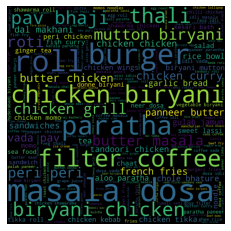

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, width = 1500, height = 1500).generate(dishes)
plt.imshow(wordcloud)
plt.axis('off')

# 3.7 Analyzing Reviews of Restaurants

In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+Casual Dining


In [ ]:
data = df['reviews_list'][0]
data

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [ ]:
data = data.lower()
data

'[(\'rated 4.0\', \'rated\\n  a beautiful place to dine in.the interiors take you back to the mughal era. the lightings are just perfect.we went there on the occasion of christmas and so they had only limited items available. but the taste and service was not compromised at all.the only complaint is that the breads could have been better.would surely like to come here again.\'), (\'rated 4.0\', \'rated\\n  i was here for dinner with my family on a weekday. the restaurant was completely empty. ambience is good with some good old hindi music. seating arrangement are good too. we ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. food was fresh and good, service is good too. good for family hangout.\\ncheers\'), (\'rated 2.0\', \'rated\\n  its a restaurant near to banashankari bda. me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. on inquiring they said this plac

In [ ]:
import re

In [ ]:
data2 = re.sub('[^a-zA-Z]', ' ', data)
data2

'   rated        rated n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again       rated        rated n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers      rated        rated n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly vis

In [ ]:
data3 = re.sub('rated', ' ', data2)
data3

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

In [ ]:
data4 = re.sub('x', ' ', data3)
data4

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

In [ ]:
data5 = re.sub(' +', ' ', data4) # convert more than one space to single space
data5

' n a beautiful place to dine in the interiors take you back to the mughal era the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again n i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangout ncheers n its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala carte items which took ages to come food was o

In [ ]:
dataset = df[df['rest_type'] == 'Quick Bites']
dataset.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining
31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500.0,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari,Quick Bites+Casual Dining
34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500.0,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari,Quick Bites+Casual Dining
36,https://www.zomato.com/bangalore/fast-and-fres...,"32, 7th Main Road, Dwaraka Nagar,Near PES Coll...",Fast And Fresh,Yes,No,2.8,91,+91 9742974232,Banashankari,Quick Bites,NaN,"North Indian, Chinese, Fast Food",400.0,"[('Rated 1.0', 'RATED\n Half baked rice in a ...",[],Delivery,Banashankari,Quick Bites+Casual Dining
39,https://www.zomato.com/bangalore/maruthi-davan...,"556/A, Water Tank Road, 3rd Stage, Banashankar...",Maruthi Davangere Benne Dosa,Yes,No,4.0,17,+91 9019563485,Banashankari,Quick Bites,NaN,South Indian,150.0,"[('Rated 5.0', ""RATED\n This restaurant serve...","['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...",Delivery,Banashankari,Quick Bites+Casual Dining


In [ ]:
total_review = ' '
for review in dataset['reviews_list']:
  review = review.lower()
  review = re.sub('[^a-zA-Z]', ' ', review)
  review = re.sub('rated', ' ', review)
  review = re.sub('x', ' ', review)
  review = re.sub(' +', ' ', review) # convert more than one space to single space
  total_review = total_review + str(review)

In [ ]:
print(total_review[0:1000])

  n great food and proper karnataka style full meals been there twice and was fully satisfied will give stars if it s well managed n reached the place at pm on saturday half of the items on the menu were over what was annoying was is the food was cold the taste was also very average only dosa and holige were good there were very few people in the restaurant and the service was still very slow the waiters were all standing in one corner and talking had to call them repeatedly n had been here good food served and tasty good place to go with freinds and family should be first to get served well with all food one of the good hotel there for this price n how can a udupi restaurant be so dirty the floor the walls the waiters are all stained in food why cant they clean it the floor even had decorative colour paper every where and lot of food now coming to the taste of the food it was pretty decent for what they chargw what upset us was the menu says they serve thambuli two variety of rice etc

(-0.5, 1499.5, 1499.5, -0.5)

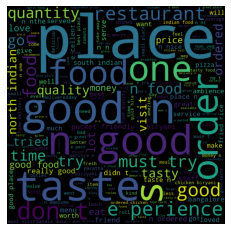

In [ ]:
wordcloud2 = WordCloud(width = 1500, height = 1500, stopwords = stopwords).generate(total_review)
plt.imshow(wordcloud2)
plt.axis('off')
# putting all reviews in one string and creating wordcloud

# 4. Machine Learning


# 4.1 Prepare data for ML

1. Prepare data for ML
2. Create a target variable
3. Check Imbalance

In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+Casual Dining


In [ ]:
# split df into 2 categories

# 1. New restaurants - rating = 0
# 2. train_val_rest - train data (rating > 0)

In [ ]:
def assign(x):
  if x > 0:
    return 1
  else:
    return 0

df['rated'] = df['rate'].apply(lambda x:assign(x))

In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated'],
      dtype='object')

In [ ]:
df['rated'].unique()

array([1, 0])

In [ ]:
new_restaurants = df[df['rated'] == 0]
train_val_restaurants = df.query('rated == 1')

In [ ]:
train_val_restaurants.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1


In [ ]:
## target column?

In [ ]:
## 'Zomato -- domain expertise
## 'restaurants whose rating is < 3.75 then bad (0) restaurant else good restaurant (1)

In [ ]:
train_val_restaurants['target'] = train_val_restaurants['rate'].apply(lambda x: 1 if x>=3.75 else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train_val_restaurants.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated,target
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others,1,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1


In [ ]:
x = train_val_restaurants['target'].value_counts()
x

0    21421
1    20244
Name: target, dtype: int64

In [ ]:
labels = x.index
labels

Int64Index([0, 1], dtype='int64')

([<matplotlib.patches.Wedge at 0x7f029bc36810>,
 [Text(-0.04879500100763322, 1.0989172161162393, '0'),
  Text(0.04879500100763285, -1.0989172161162393, '1')])

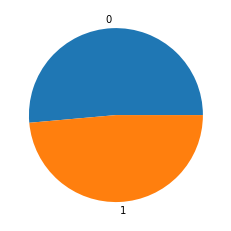

In [ ]:
plt.pie(x, labels=labels)

# 4.2 Feature Importance On Data

In [ ]:
train_val_restaurants.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated', 'target'],
      dtype='object')

In [ ]:
## from this n no of features select the k features k<n
## domain expertise --> which features are best for building the model?

In [ ]:
train_val_restaurants.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated,target
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others,1,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1


In [ ]:
len(train_val_restaurants['cuisines'][0].split(','))

3

In [ ]:
# Lets get count of cuisines as a separate feature

def count(x):
  return len(x.split(','))

train_val_restaurants['total_cuisines'] = train_val_restaurants['cuisines'].astype(str).apply(lambda x: count(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train_val_restaurants['multiple_types'] = train_val_restaurants['rest_type'].astype(str).apply(lambda x: count(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train_val_restaurants.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated,target,total_cuisines,multiple_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,...,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1,3,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,...,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1,3,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining",...,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others,1,1,3,2
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,...,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,0,2,1
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,...,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1,2,1


In [ ]:
train_val_restaurants.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated', 'target',
       'total_cuisines', 'multiple_types'],
      dtype='object')

In [ ]:
imp_features = ['online_order', 'book_table',
       'location', 'rest_type',
       'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)', 'target',
       'total_cuisines', 'multiple_types']

In [ ]:
data = train_val_restaurants[imp_features]
data.head()

,online_order,book_table,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,total_cuisines,multiple_types
0,Yes,Yes,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
1,Yes,No,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
2,Yes,No,Banashankari,"Cafe, Casual Dining",800.0,Buffet,Banashankari,1,3,2
3,No,No,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,2,1
4,No,No,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,2,1


In [ ]:
data.shape

(41665, 10)

# 4.3 Missing Values in Data

In [ ]:
data.head()

,online_order,book_table,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,total_cuisines,multiple_types
0,Yes,Yes,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
1,Yes,No,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
2,Yes,No,Banashankari,"Cafe, Casual Dining",800.0,Buffet,Banashankari,1,3,2
3,No,No,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,2,1
4,No,No,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,2,1


In [ ]:
data.isnull().sum()

online_order                     0
book_table                       0
location                         0
rest_type                      149
approx_cost(for two people)    247
listed_in(type)                  0
listed_in(city)                  0
target                           0
total_cuisines                   0
multiple_types                   0
dtype: int64

In [ ]:
data.shape

(41665, 10)

In [ ]:
# Very less null values so drop them

In [ ]:
data.dropna(how = 'any', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data.head()

,online_order,book_table,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,total_cuisines,multiple_types
0,Yes,Yes,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
1,Yes,No,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
2,Yes,No,Banashankari,"Cafe, Casual Dining",800.0,Buffet,Banashankari,1,3,2
3,No,No,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,2,1
4,No,No,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,2,1


In [ ]:
data.shape

(41271, 10)

In [ ]:
data.dtypes

online_order                    object
book_table                      object
location                        object
rest_type                       object
approx_cost(for two people)    float64
listed_in(type)                 object
listed_in(city)                 object
target                           int64
total_cuisines                   int64
multiple_types                   int64
dtype: object

In [ ]:
lst_cat = []

for column in data.columns:
  if data[column].dtype == 'O':
    lst_cat.append(column)

lst_cat

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [ ]:
lst_num = []

for column in data.columns:
  if data[column].dtype != 'O':
    lst_num.append(column)

lst_num

['approx_cost(for two people)', 'target', 'total_cuisines', 'multiple_types']

In [ ]:
for feature in lst_cat:
  print(data[feature].nunique(), f'unique features in {feature} column')

2 unique features in online_order column
2 unique features in book_table column
92 unique features in location column
87 unique features in rest_type column
7 unique features in listed_in(type) column
30 unique features in listed_in(city) column


# 4.4 Feature Encoding on Data

In [ ]:
data.head()

,online_order,book_table,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,total_cuisines,multiple_types
0,Yes,Yes,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
1,Yes,No,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
2,Yes,No,Banashankari,"Cafe, Casual Dining",800.0,Buffet,Banashankari,1,3,2
3,No,No,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,2,1
4,No,No,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,2,1


In [ ]:
data[lst_cat].head()

,online_order,book_table,location,rest_type,listed_in(type),listed_in(city)
0,Yes,Yes,Banashankari,Casual Dining,Buffet,Banashankari
1,Yes,No,Banashankari,Casual Dining,Buffet,Banashankari
2,Yes,No,Banashankari,"Cafe, Casual Dining",Buffet,Banashankari
3,No,No,Banashankari,Quick Bites,Buffet,Banashankari
4,No,No,Basavanagudi,Casual Dining,Buffet,Banashankari


In [ ]:
# ML is all about maths, it does not understand categorical data
# Convert string data into numbers using feature encoding

In [ ]:
# One hot encoding is one such method to do this

In [ ]:
# If online_order has 2 values, Yes, No --> one new feature for every unique category

In [ ]:
# But location has 92 unique values, so one hot encoding creates 92 columns, that makes the model complex. SO avoid one hot here.

In [ ]:
data['location'].nunique()

92

In [ ]:
# % of data contribution
values = data['location'].value_counts()*100/len(data)
values

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
                           ...   
Yelahanka                0.009692
West Bangalore           0.007269
Rajarajeshwari Nagar     0.004846
Nagarbhavi               0.002423
Peenya                   0.002423
Name: location, Length: 92, dtype: float64

In [ ]:
# Now some values here have very less contribution like West Bangalore etc.
# Now we reduce the unique values in the location column from 92 to 47
# basically reduce the numebr of categories
threshold = 0.4
print(len(values[values>threshold]))
imp = values[values>threshold]
imp

46


BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
Jayanagar                3.959197
Whitefield               3.808970
Marathahalli             3.416443
Bannerghatta Road        2.970609
Koramangala 7th Block    2.556274
Koramangala 6th Block    2.553851
Brigade Road             2.549005
Bellandur                2.415740
Sarjapur Road            2.069250
Koramangala 1st Block    2.064404
Ulsoor                   2.057135
Koramangala 4th Block    2.037750
Electronic City          2.020789
MG Road                  1.921446
Banashankari             1.802719
Kalyan Nagar             1.681568
Malleshwaram             1.553149
Residency Road           1.463497
Richmond Road            1.463497
Basavanagudi             1.441690
Frazer Town              1.371423
Church Street            1.322963
Brookefield              1.315694
New BEL Road             1.226042
Kammanahalli  

In [ ]:
data['location'].nunique()

92

In [ ]:
imp.nunique()

45

In [ ]:
data['location'] = np.where(data['location'].isin(imp.index), data['location'], 'other')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data['location'].nunique()

47

In [ ]:
data.head()

,online_order,book_table,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,total_cuisines,multiple_types
0,Yes,Yes,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
1,Yes,No,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
2,Yes,No,Banashankari,"Cafe, Casual Dining",800.0,Buffet,Banashankari,1,3,2
3,No,No,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,2,1
4,No,No,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,2,1


In [ ]:
data['book_table'].nunique()

2

In [ ]:
# For rest_type column

values2 = data['rest_type'].value_counts()*100/len(data)
values2

Quick Bites                   33.643478
Casual Dining                 23.299654
Cafe                           8.163117
Dessert Parlor                 4.482566
Delivery                       4.048848
                                ...    
Food Court, Beverage Shop      0.004846
Dessert Parlor, Food Court     0.004846
Dessert Parlor, Kiosk          0.004846
Bakery, Beverage Shop          0.002423
Quick Bites, Kiosk             0.002423
Name: rest_type, Length: 87, dtype: float64

In [ ]:
threshold = 1.5
print(len(values2[values2>threshold]))
imp2 = values2[values2>threshold]
imp2

10


Quick Bites           33.643478
Casual Dining         23.299654
Cafe                   8.163117
Dessert Parlor         4.482566
Delivery               4.048848
Takeaway, Delivery     3.099028
Casual Dining, Bar     2.645926
Bakery                 1.705798
Beverage Shop          1.555572
Bar                    1.550726
Name: rest_type, dtype: float64

In [ ]:
# From 87 to 10 unique values

In [ ]:
data['rest_type'] = np.where(data['rest_type'].isin(imp2.index), data['rest_type'], 'other')
data.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,online_order,book_table,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,total_cuisines,multiple_types
0,Yes,Yes,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
1,Yes,No,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
2,Yes,No,Banashankari,other,800.0,Buffet,Banashankari,1,3,2
3,No,No,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,2,1
4,No,No,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,2,1
5,Yes,No,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,1,1
6,No,No,other,Casual Dining,800.0,Buffet,Banashankari,0,4,1
7,Yes,Yes,Banashankari,other,600.0,Cafes,Banashankari,1,3,2
8,Yes,No,Banashankari,Cafe,700.0,Cafes,Banashankari,1,3,1
9,Yes,No,Banashankari,Cafe,550.0,Cafes,Banashankari,1,5,1


In [ ]:
data['rest_type'].nunique()

11

In [ ]:
for feature in lst_cat:
  print(data[feature].nunique(), f'unique features in {feature} column')

2 unique features in online_order column
2 unique features in book_table column
47 unique features in location column
11 unique features in rest_type column
7 unique features in listed_in(type) column
30 unique features in listed_in(city) column


In [ ]:
# Now lets apply one hot encoding on this data

In [ ]:
data_cat = data[lst_cat]
data_cat

,online_order,book_table,location,rest_type,listed_in(type),listed_in(city)
0,Yes,Yes,Banashankari,Casual Dining,Buffet,Banashankari
1,Yes,No,Banashankari,Casual Dining,Buffet,Banashankari
2,Yes,No,Banashankari,other,Buffet,Banashankari
3,No,No,Banashankari,Quick Bites,Buffet,Banashankari
4,No,No,Basavanagudi,Casual Dining,Buffet,Banashankari
...,...,...,...,...,...,...
51709,No,No,Whitefield,"Casual Dining, Bar",Pubs and bars,Whitefield
51711,No,No,Whitefield,"Casual Dining, Bar",Pubs and bars,Whitefield
51712,No,No,Whitefield,Bar,Pubs and bars,Whitefield
51715,No,Yes,other,Bar,Pubs and bars,Whitefield


In [ ]:
lst_cat

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [ ]:
for col in lst_cat:
  col_encoded = pd.get_dummies(data_cat[col], prefix=col, drop_first = True)
  data_cat = pd.concat([data_cat, col_encoded], axis = 1)
  data_cat.drop(col, axis = 1, inplace = True)

data_cat

,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Bellandur,location_Brigade Road,location_Brookefield,location_Church Street,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51715,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 4.5 Random Forest

In [ ]:
data.columns

Index(['online_order', 'book_table', 'location', 'rest_type',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)',
       'target', 'total_cuisines', 'multiple_types'],
      dtype='object')

In [ ]:
lst_num

['approx_cost(for two people)', 'target', 'total_cuisines', 'multiple_types']

In [ ]:
data_final = pd.concat([data[lst_num], data_cat], axis = 1)
data_final

,approx_cost(for two people),target,total_cuisines,multiple_types,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,800.0,1,3,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,800.0,1,3,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,800.0,1,3,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,300.0,0,2,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,600.0,1,2,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,800.0,0,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51711,800.0,0,4,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51712,1500.0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51715,2500.0,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = data_final.drop('target', axis = 1)
y = data_final['target']

In [ ]:
# Training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape

(33016, 96)

In [ ]:
# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
predictions = model.predict(X_test)
predictions

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
confusion_matrix(predictions, y_test)

array([[3511,  956],
       [ 741, 3047]])

In [ ]:
accuracy_score(predictions, y_test)

0.7944276196244701

In [ ]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


KeyboardInterrupt: ignored

In [ ]:
rf_random.best_params_

In [ ]:
random_y_pred = rf_random.best_estimator_.fit(X_train, y_train).predict(X_test)
accuracy_score(random_y_pred, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 60, 70],
    'max_features' : ['auto', 'sqrt'],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [10],
    'n_estimators': [200, 500, 700]
}
# Create a based model
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [ ]:
grid_y_pred = grid_search.best_estimator_.fit(X_train, y_train).predict(X_test)
accuracy_score(grid_y_pred, y_test)

# 4.6 KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
print(cm)
print(accuracy_score(y_pred, y_test))

[[3623 1006]
 [ 629 2997]]
0.8019382192610539


In [ ]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = [25,26,27,28,29,30]
n_neighbors = [5]
p=[2]    #//p = 1:Manhattan Distance, p = 2: Euclidean distance
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(estimator = knn_2, param_grid = hyperparameters, cv=3)
#Fit the model
best_model = clf.fit(X_train, y_train)
print(best_model.best_params_)

{'leaf_size': 25, 'n_neighbors': 5, 'p': 2}


In [ ]:
y_pred = best_model.best_estimator_.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_pred, y_test))

0.8019382192610539
